In [1]:
"""
Yarne Hermann YPH2105
"""
%matplotlib inline

import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from data.stanford_dogs import StanfordDogs

BATCH_SIZE = 32

In [2]:
train_dataset = StanfordDogs('./images')
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

0 30 Norwich_terrier
1 65 boxer
2 87 Newfoundland
3 26 dhole
4 24 Doberman


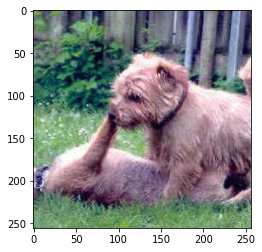

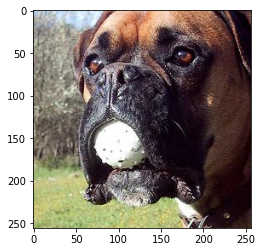

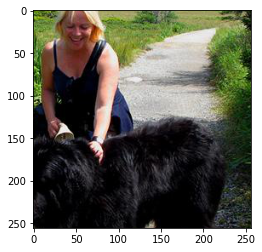

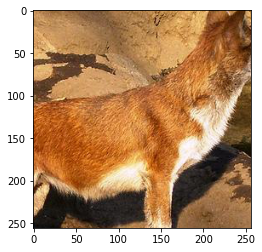

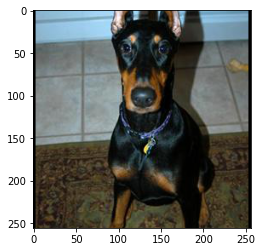

In [8]:

for i in range(5):
    sample_img, sample_target = train_dataset[i]
    print(i, sample_target, train_dataset.classes[sample_target])
    plt.figure()
    plt.imshow(np.moveaxis(sample_img.numpy() * 0.5 + 0.5, 0, -1))

In [6]:
sample_img, sample_target = train_dataset[0]
print(sample_img)


tensor([[[-0.1059,  0.0039, -0.0902,  ..., -0.5529, -0.5529, -0.5765],
         [-0.1216,  0.0275, -0.0902,  ..., -0.5216, -0.5294, -0.5608],
         [-0.0431, -0.0588, -0.1373,  ..., -0.5843, -0.5529, -0.5686],
         ...,
         [-0.0588, -0.1451, -0.1137,  ..., -0.0980, -0.0745, -0.0588],
         [-0.0824, -0.2000, -0.2235,  ..., -0.0118, -0.0039, -0.0039],
         [-0.0980, -0.2000, -0.3020,  ..., -0.0196, -0.0745, -0.1137]],

        [[ 0.2157,  0.3255,  0.2235,  ..., -0.5686, -0.5686, -0.5843],
         [ 0.2784,  0.4118,  0.2784,  ..., -0.5373, -0.5451, -0.5686],
         [ 0.3961,  0.3804,  0.2706,  ..., -0.6000, -0.5686, -0.5765],
         ...,
         [ 0.2941,  0.2078,  0.2392,  ...,  0.2706,  0.2941,  0.3098],
         [ 0.2784,  0.1608,  0.1294,  ...,  0.3569,  0.3647,  0.3647],
         [ 0.2706,  0.1608,  0.0588,  ...,  0.3569,  0.3020,  0.2627]],

        [[-0.3176, -0.1451, -0.1843,  ..., -0.2784, -0.2784, -0.3176],
         [-0.4431, -0.2314, -0.2863,  ..., -0

In [3]:
'''
To test this cell we need to disable the cropping transform in stanford_dogs.py

Some pictures seem to have smaller dimensions than the crop size of 256, 256. 
Smallest width = 100, height = 97
When cropping smaller images, they get zero-padded. 
2447/20588 have at least one dimension smaller than 256. That is about 1/8 which I think we should reduce.
We should make a decision on what we do about this:
- Don't care
- Use smaller crop size
- Remove the smaller images from the dataset (Maybe combined with using a smaller crop size) 
'''

min_w = 1000
min_h = 1000
nr_imgs_smaller_than_crop = 0

for i in range(len(train_dataset.current_dataset)):
    sample_img, sample_target = train_dataset[i]
    dims = sample_img.shape
    if (dims[1] < train_dataset.CROP_SIZE or dims[2] < train_dataset.CROP_SIZE):
        nr_imgs_smaller_than_crop += 1
    min_w = min(min_w, dims[1])
    min_h = min(min_h, dims[2])
print("Minimum width:", min_w)
print("Minimum height:", min_h)
print("Nr images smaller than crop size:", nr_imgs_smaller_than_crop)

Minimum width: 100
Minimum height: 97
Nr images smaller than crop size: 2447


In [4]:
print(len(train_dataset.current_dataset))

20580
